In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()



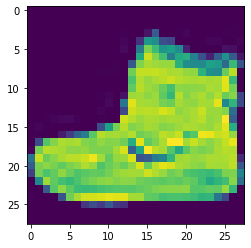

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [7]:
# creating a human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


Text(0.5, 1.0, 'T-shirt/top')

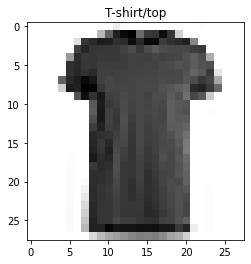

In [15]:

plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

 build a multiclasss classification model


In [53]:
#  shape of one image
train_data[0].shape

(28, 28)

In [54]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])
non_norm_history = model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 108.3327 - val_accuracy: 0.7341
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 102.6736 - val_accuracy: 0.7373
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 132.9137 - val_accuracy: 0.7042
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 150.7092 - val_accuracy: 0.7028
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 126.4341 - val_accuracy: 0.7159
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 118.

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 3140      
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [57]:
train_data.min(),train_data.max()

(0.0, 1.0)

In [59]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0    

In [60]:
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [62]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])
norm_history = model.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 31.4145 - val_accuracy: 0.1995
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.4834 - accuracy: 0.3576 - val_loss: 87.3902 - val_accuracy: 0.1994
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3583 - accuracy: 0.4153 - val_loss: 137.2140 - val_accuracy: 0.1996
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2828 - accuracy: 0.4371 - val_loss: 159.2106 - val_accuracy: 0.2000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2445 - accuracy: 0.4479 - val_loss: 159.5399 - val_accuracy: 0.2001
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2211 - accuracy: 0.4612 - val_loss: 165.3766 - val_accuracy: 0.2004
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.2046 - accuracy: 0.4690 - val_loss: 163.1

<AxesSubplot:>

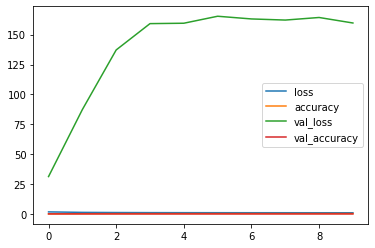

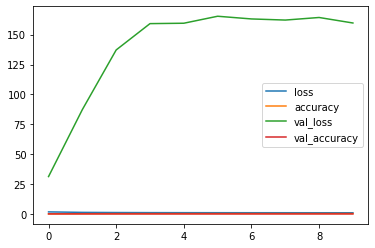

In [69]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot()

pd.DataFrame(norm_history.history).plot()

In [70]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))
lr_history = model.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 15s 7ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 31.4145 - val_accuracy: 0.1995 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 12s 7ms/step - loss: 1.4749 - accuracy: 0.3622 - val_loss: 95.4945 - val_accuracy: 0.1998 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3348 - accuracy: 0.4223 - val_loss: 145.6936 - val_accuracy: 0.1996 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 16s 9ms/step - loss: 1.2577 - accuracy: 0.4466 - val_loss: 162.8013 - val_accuracy: 0.2001 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2197 - accuracy: 0.4595 - val_loss: 158.1636 - val_accuracy: 0.2003 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1952 - accuracy: 0.4744 - val_loss: 167.6752 - val_accuracy: 0.2011 - lr: 0.0018
Epoch 7/40
1875/1875 [====================

Text(0.5, 1.0, 'finding the ideal learning rate')

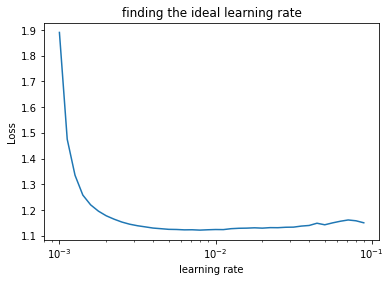

In [71]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs,lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("finding the ideal learning rate")

#  trained without normalizing

In [90]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(lr=0.001),
             metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

lr_history = model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels),callbacks=[lr_scheduler])




C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 108.5675 - val_accuracy: 0.7350 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 104.2177 - val_accuracy: 0.7335 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 143.8113 - val_accuracy: 0.6955 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 154.3259 - val_accuracy: 0.6986 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 134.0122 - val_accuracy: 0.7042 - lr: 0.0018
Epoch 7/10
1875/1875 [=========================

Text(0.5, 1.0, 'finding the ideal learning rate')

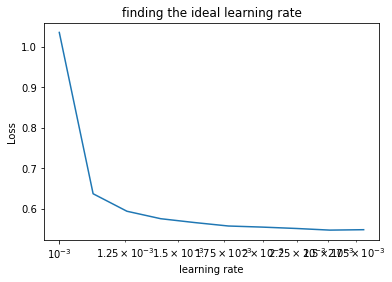

In [104]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 *(10**(tf.range(10)/20))
plt.semilogx(lrs,lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("finding the ideal learning rate")


In [73]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None):
    # create the confusion matrix
    cm=confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]#normalize the confusion matrix
    n_classes = cm.shape[0]

    # lets prettry fy it 
    fig,ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)
    # create classes
    if classes:
        labels=classes
    else:
        labels = np.arange(cm.shape[0])
    #label the axis
    ax.set(title="confusion matrix",
            xlabel = "predicted label",
            ylabel = "True label",
            xticks = np.arange(n_classes),
            yticks = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels
          )
    threeshold = (cm.max()+cm.min())/2. 
    # plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment ="center",
                color = "white" if cm[i,j]>threeshold else "black",
                size = 15
                )


In [94]:
y_probs = model.predict(test_data)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.0932692e-22, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [95]:
y_probs[0],train_labels[:10]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))

In [97]:
y_preds = y_probs.argmax(axis = 1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 8, 7], dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[670,  11,  21,  75,  72,   0, 138,   0,  13,   0],
       [  3, 942,   2,  25,  21,   0,   7,   0,   0,   0],
       [ 18,   1, 421,   5, 496,   0,  39,   0,  19,   1],
       [ 34,  21,   6, 693, 203,   0,  14,   0,  28,   1],
       [  0,   0,  21,   3, 964,   0,   6,   0,   3,   3],
       [  0,   0,   1,   0,   1, 150,   0,  76, 113, 659],
       [110,   4,  91,  34, 586,   0, 151,   0,  23,   1],
       [  0,   0,   0,   0,   0,   0,   0, 758,   3, 239],
       [  2,   1,  15,   9,  45,   0,   2,   3, 902,  21],
       [  0,   0,   1,   0,   1,   0,   0,  11,   0, 987]], dtype=int64)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (4).

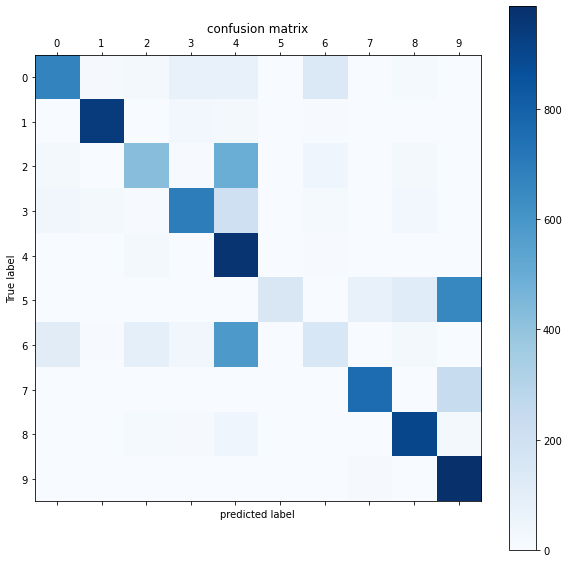

In [100]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names)

In [101]:
import random
def plot_random_image(model,images,true_labels,classes):
#     pics a  random image and labels it with a prediciton and truth label
    i = random.randint(0,len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    plt.imshow(target_image,cmap=plt.cm.binary)
#     change the color of the titles depending on if the predicyion is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "Red"
    plt.xlabel("Pred:{}{:2.0f}%  (True:{})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label)
                                                ,color=color)

1/1 [==============================] - 0s 38ms/step


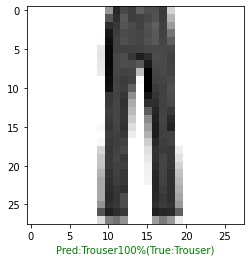

In [119]:
plot_random_image(model=model,images=test_data,true_labels=test_labels,classes=class_names)

1/1 [==============================] - 0s 30ms/step


'T-shirt/top'

# weight and biases of our model

In [131]:
weigths,biases = model.layers[1].get_weights()
weigths,weigths.shape

(array([[ 0.75063384, -0.27313238, -0.82188463, -0.9127995 ],
        [ 0.26917058, -0.4646553 , -0.54879236, -0.06272327],
        [ 0.7295087 ,  0.5222194 , -1.0784712 , -0.7401483 ],
        ...,
        [-0.32873824,  0.6464727 , -0.31933314,  0.20277654],
        [-0.34444857,  0.71963626,  0.21344   , -0.55143356],
        [ 0.19599338,  0.12751089, -0.16020966,  0.0435261 ]],
       dtype=float32),
 (784, 4))

# checking inputs and outputs

In [139]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [138]:
!pip install pydot


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
